In [34]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.cluster import KMeans
import warnings
import os
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import datasets
from sklearn.cluster import KMeans

In [3]:
customerdf = pd.read_csv('C:/Users/danin/Downloads/Mall_Customers.csv')
customerdf.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customerdf.shape

(200, 5)

In [5]:
customerdf.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


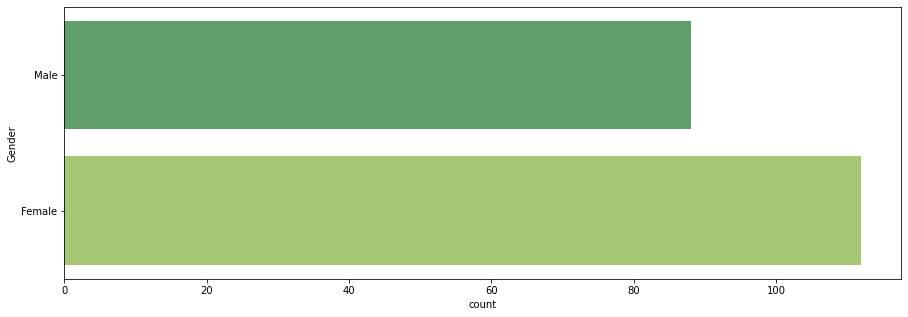

In [6]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = customerdf, palette="summer")
plt.show()

Text(0, 0.5, 'Count')

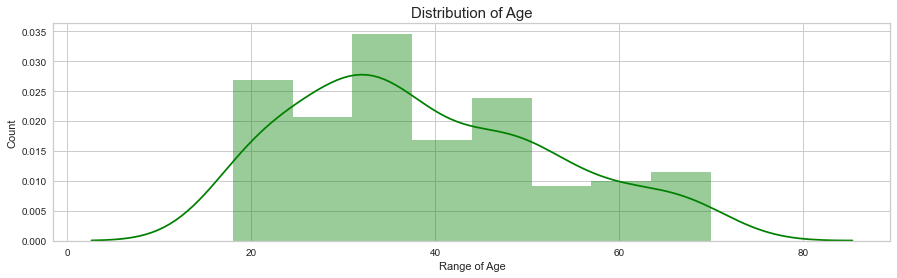

In [50]:
#Distribution of age
plt.figure(figsize=(15, 4))
sns.distplot(customerdf['Age'], color ='green')
plt.title('Distribution of Age', fontsize = 15)
plt.xlabel('Range of Age')
plt.ylabel('Count')

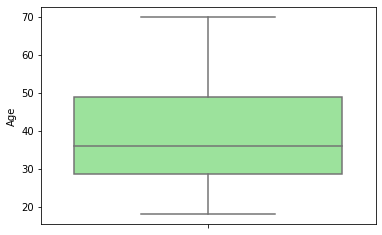

In [8]:
#Boxplot of the Age 

sns.boxplot( y=customerdf['Age'],color ='lightgreen' );
plt.show()

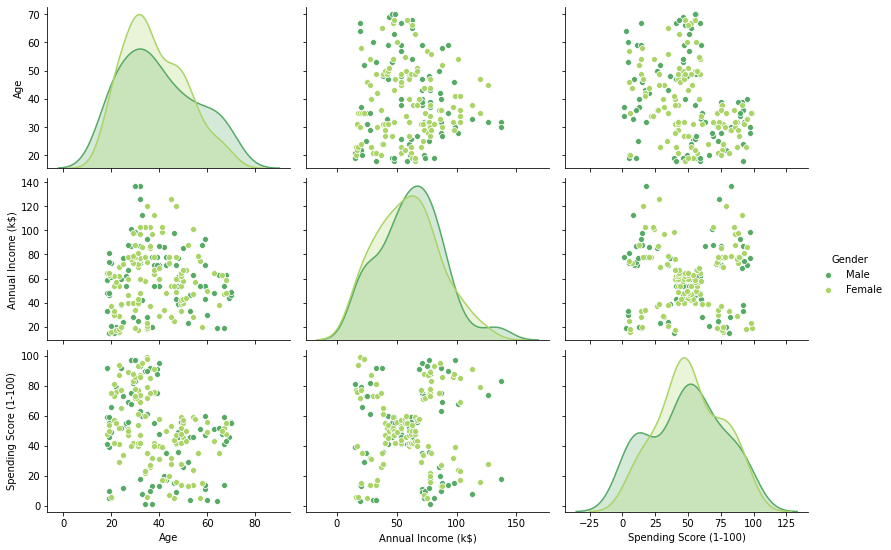

In [9]:
X = customerdf.drop(['CustomerID', 'Gender'], axis=1)
sns.pairplot(customerdf.drop('CustomerID', axis=1), hue='Gender', aspect=1.5,palette="summer")
plt.show()

Text(0, 0.5, 'Count')

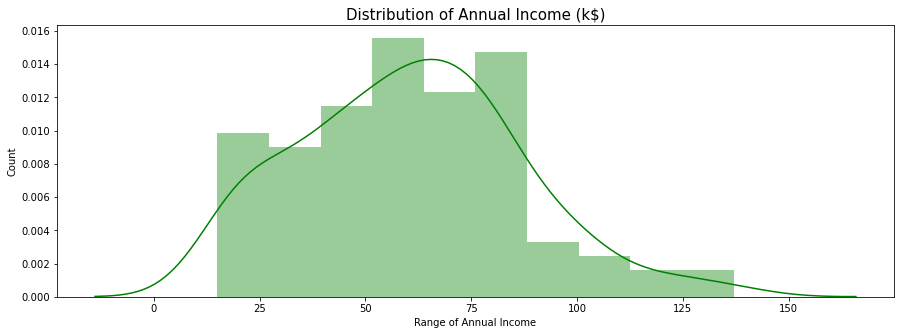

In [10]:
#Distribution of Annual Income
plt.figure(figsize=(15, 5))
sns.distplot(customerdf['Annual Income (k$)'], color ='green')
plt.title('Distribution of Annual Income (k$)', fontsize = 15)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')

ValueError: could not convert string to float: 'Male'

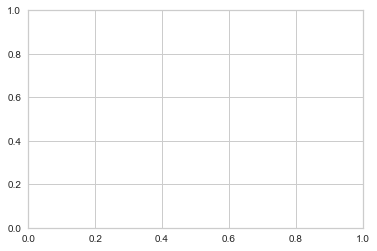

In [63]:
X = customerdf.drop(['CustomerID', 'Annual Income (k$)'], axis=1)
sns.kdeplot(customerdf.drop('CustomerID', axis=1), hue='Annual Income (k$)', aspect=1.5,palette="summer")
plt.show()

Text(0, 0.5, 'Count')

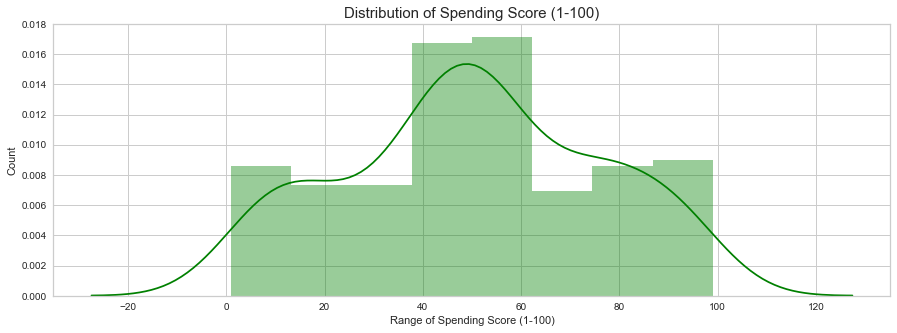

In [17]:
#Distribution of Spending Score (1-100)
plt.figure(figsize=(15, 5))
sns.distplot(customerdf['Spending Score (1-100)'], color ='green')
plt.title('Distribution of Spending Score (1-100)', fontsize = 15)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

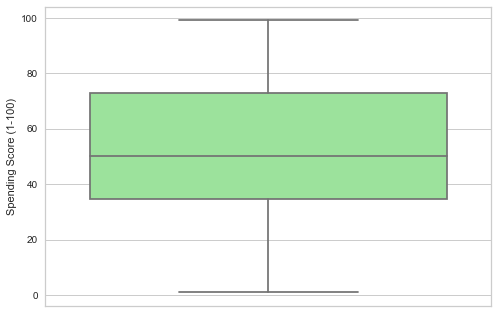

In [18]:
#Boxplot of the Spending Score (1-100)
sns.boxplot( y=customerdf['Spending Score (1-100)'],color ='lightgreen' );
plt.show()

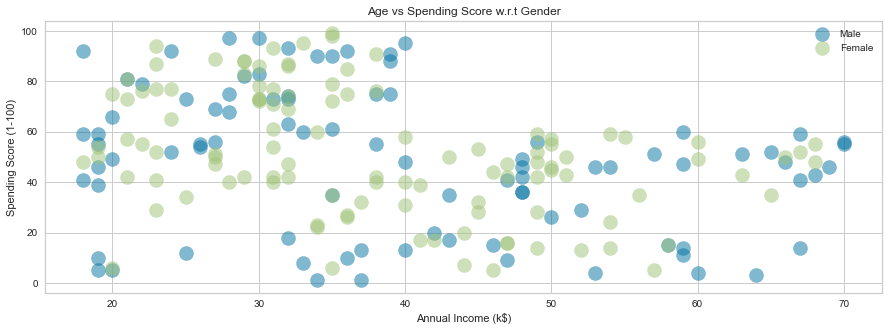

In [44]:
plt.figure(1 , figsize = (15 , 5))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age',y = 'Spending Score (1-100)' ,
                data = customerdf[customerdf['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Age vs Spending Score based on Gender')
plt.legend()
plt.show()

In [55]:
ssd=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    ssd.append(km.inertia_)

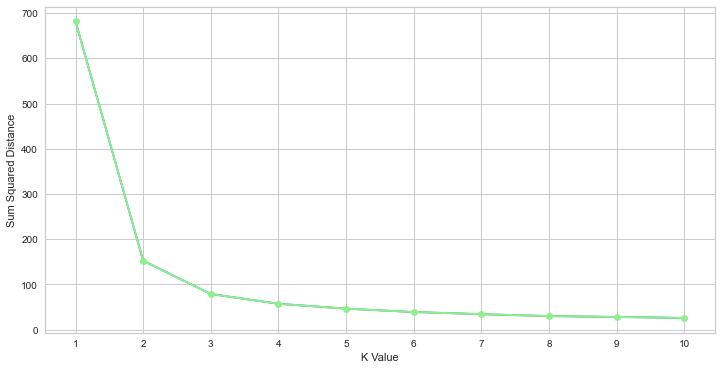

In [62]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),ssd)
plt.plot(range(1,11),ssd, linewidth=2, color="lightgreen", marker ="o")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("Sum Squared Distance")
plt.show()